<a href="https://colab.research.google.com/github/ahmed-hassan97/Image-Data-Augmentation-with-Keras/blob/master/Breast_cancer_detection_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <a href ="http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz"> link dataset  </a> </h1> 

## This dataset from This Website 

https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/

In [1]:
!wget http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz

--2021-02-09 14:47:02--  http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
Resolving www.inf.ufpr.br (www.inf.ufpr.br)... 200.17.202.112, 2801:82:80ff:8001:216:c8ff:fe11:aa0e
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4273561758 (4.0G) [application/x-gzip]
Saving to: ‘BreaKHis_v1.tar.gz’

BreaKHis_v1.tar.gz  100%[===================>]   3.98G  10.2MB/s    in 6m 48s  

2021-02-09 14:53:52 (9.99 MB/s) - ‘BreaKHis_v1.tar.gz’ saved [4273561758/4273561758]



## import library

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

## extract data

In [3]:
import tarfile
my_tar = tarfile.open('/content/BreaKHis_v1.tar.gz')
my_tar.extractall('./dataset') # specify which folder to extract to
my_tar.close()

## create folder name it as train_dataset

## inside this folder create two folder 

1-benign

2-malignent

In [14]:
## benign

folder1 = "/content/dataset/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis"
folder2 = "/content/dataset/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma"
folder3 = "/content/dataset/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor"
folder4 = "/content/dataset/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma"


## benign path
destination_benign = '/content/train_dataset/benign'

for f in os.listdir(folder1):
  for i_f in os.listdir( folder1+ "/" + f):
    for i2_f in os.listdir(folder1 + "/" + f + "/" + i_f):
      path = folder1 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_benign)

for f in os.listdir(folder2):
  for i_f in os.listdir( folder2+ "/" + f):
    for i2_f in os.listdir(folder2 + "/" + f + "/" + i_f):
      path = folder2 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_benign)

for f in os.listdir(folder3):
  for i_f in os.listdir( folder3+ "/" + f):
    for i2_f in os.listdir(folder3 + "/" + f + "/" + i_f):
      path = folder3 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_benign)

for f in os.listdir(folder4):
  for i_f in os.listdir( folder4+ "/" + f):
    for i2_f in os.listdir(folder4 + "/" + f + "/" + i_f):
      path = folder4 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_benign)      
     

In [16]:
## benign

folder1 = "/content/dataset/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma"
folder2 = "/content/dataset/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma"
folder3 = "/content/dataset/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma"
folder4 = "/content/dataset/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma"


## malignent path
destination_malignent = '/content/train_dataset/malignent'



for f in os.listdir(folder1):
  for i_f in os.listdir( folder1+ "/" + f):
    for i2_f in os.listdir(folder1 + "/" + f + "/" + i_f):
      path = folder1 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_malignent)

for f in os.listdir(folder2):
  for i_f in os.listdir( folder2+ "/" + f):
    for i2_f in os.listdir(folder2 + "/" + f + "/" + i_f):
      path = folder2 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_malignent)

for f in os.listdir(folder3):
  for i_f in os.listdir( folder3+ "/" + f):
    for i2_f in os.listdir(folder3 + "/" + f + "/" + i_f):
      path = folder3 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_malignent)

for f in os.listdir(folder4):
  for i_f in os.listdir( folder4+ "/" + f):
    for i2_f in os.listdir(folder4 + "/" + f + "/" + i_f):
      path = folder4 + "/" + f + "/" + i_f + "/" + i2_f
      shutil.copy(path , destination_malignent)      
     

In [18]:
sum_benign =0
sum_malignant =0

for i in os.listdir('/content/train_dataset/benign'):
  sum_benign+=1
for i in os.listdir('/content/train_dataset/malignent'):
  sum_malignant+=1

In [19]:
print("malignant dataset has : ", sum_malignant)
print("benign dataset has : ", sum_benign)

malignant dataset has :  5429
benign dataset has :  2480


In [4]:

import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline



In [ ]:
# !python -m zipfile -c dataset.zip '/content/final_dataset'

In [5]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

benign = np.array(Dataset_loader('/content/train_dataset/benign',227))
malign = np.array(Dataset_loader('/content/train_dataset/malignent',227))


100%|██████████| 5429/5429 [01:26<00:00, 62.92it/s]


In [6]:
# Skin Cancer: Malignant vs. Benign
# Create labels
benign_train_label = np.zeros(len(benign))
malign_train_label = np.ones(len(malign))


# Merge data 
X_train = np.concatenate((benign, malign), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]


# To categorical
Y_train = to_categorical(Y_train, num_classes= 2)


In [7]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

In [8]:
print("x_train shape is : ", x_train.shape)
print("y_train shape is : ", y_train.shape)
print("x_val shape is : ", x_val.shape)
print("y_val shape is : ", y_val.shape)

x_train shape is :  (6327, 227, 227, 3)
y_train shape is :  (6327, 2)
x_val shape is :  (1582, 227, 227, 3)
y_val shape is :  (1582, 2)


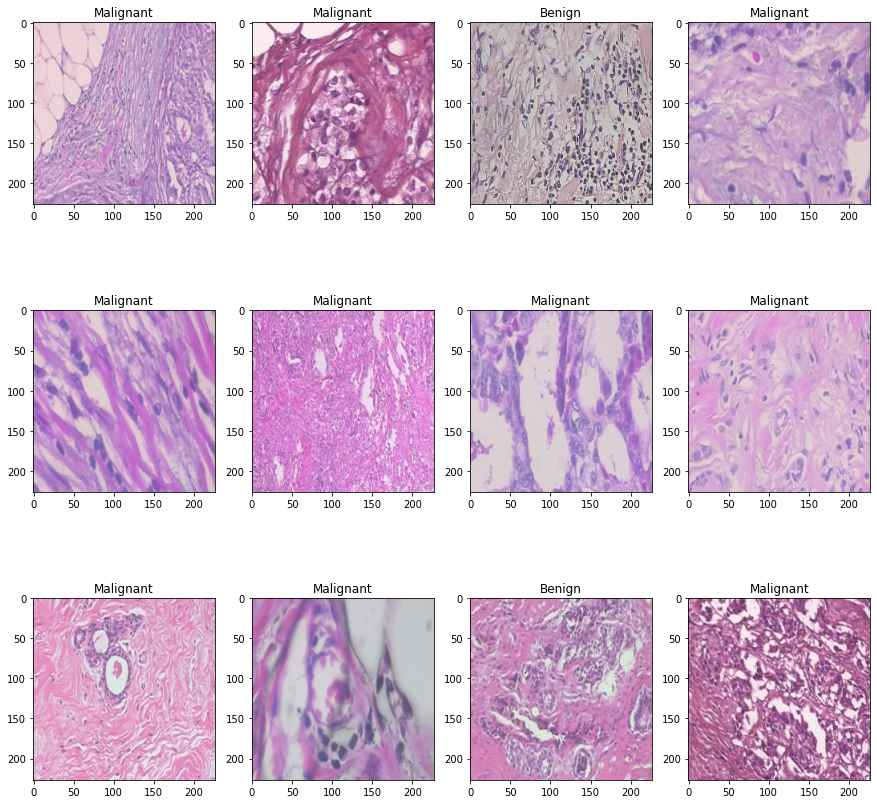

In [9]:
w = 60 
h = 40
fig = plt.figure(figsize=(15,15))
columns = 4
row = 3

for i in range(1, row*columns +1):
  ax = fig.add_subplot(row , columns , i)
  if np.argmax(y_train[i] == 0):
    ax.title.set_text('Benign')

  else:
    ax.title.set_text('Malignant')
  plt.imshow(x_train[i])
plt.show() 

<h1> <a>  Data Generator </a> </h1>

In [11]:
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

<h1> <a>  CNN MODEL 
Model: ResNet50  </a> </h1>

In [12]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model


In [13]:
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(227,227,3)
)

In [14]:
model = build_model(resnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense (Dense)                (None, 2)                 3842      
Total params: 18,333,506
Trainable params: 18,100,610
Non-trainable params: 232,896
_________________________________________________________________


In [15]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="./weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Training & Evaluation

In [16]:
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
395/395 [==============================] - 313s 711ms/step - loss: 0.5225 - accuracy: 0.7798 - val_loss: 0.3086 - val_accuracy: 0.9235
Epoch 2/5
395/395 [==============================] - 269s 679ms/step - loss: 0.3290 - accuracy: 0.8664 - val_loss: 0.2808 - val_accuracy: 0.9008
Epoch 3/5
395/395 [==============================] - 269s 679ms/step - loss: 0.2887 - accuracy: 0.8856 - val_loss: 0.1536 - val_accuracy: 0.9444
Epoch 4/5
395/395 [==============================] - 269s 679ms/step - loss: 0.2408 - accuracy: 0.9069 - val_loss: 0.1142 - val_accuracy: 0.9595
Epoch 5/5
395/395 [==============================] - 268s 678ms/step - loss: 0.2474 - accuracy: 0.9017 - val_loss: 0.2349 - val_accuracy: 0.9159


In [17]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)

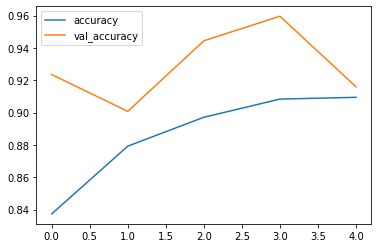

In [20]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

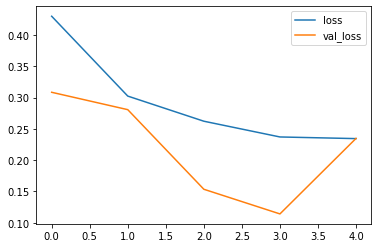

In [21]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [24]:
model.save("model.h5")

In [43]:
from tensorflow import keras
model = keras.models.load_model('/content/model.h5')

## prediction 

In [44]:
Y_val_pred = model.predict(x_val)

In [45]:
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

0.915929203539823

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[ 414  116]
 [  17 1035]]


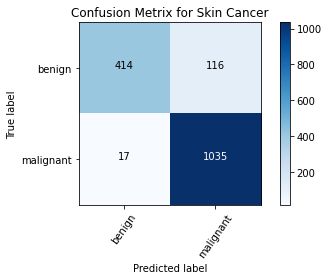

In [27]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

## Classification Report

In [28]:
from sklearn.metrics import classification_report
classification_report( np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

'              precision    recall  f1-score   support\n\n           0       0.96      0.78      0.86       530\n           1       0.90      0.98      0.94      1052\n\n    accuracy                           0.92      1582\n   macro avg       0.93      0.88      0.90      1582\nweighted avg       0.92      0.92      0.91      1582\n'

In [29]:
target_names = ['benign', 'malignent']
print(classification_report( np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       530
           1       0.90      0.98      0.94      1052

    accuracy                           0.92      1582
   macro avg       0.93      0.88      0.90      1582
weighted avg       0.92      0.92      0.91      1582



## ROC and AUC

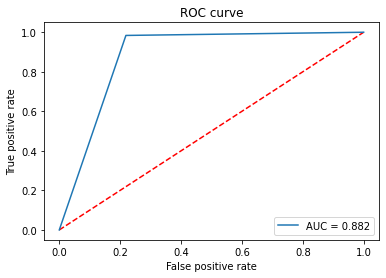

In [30]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

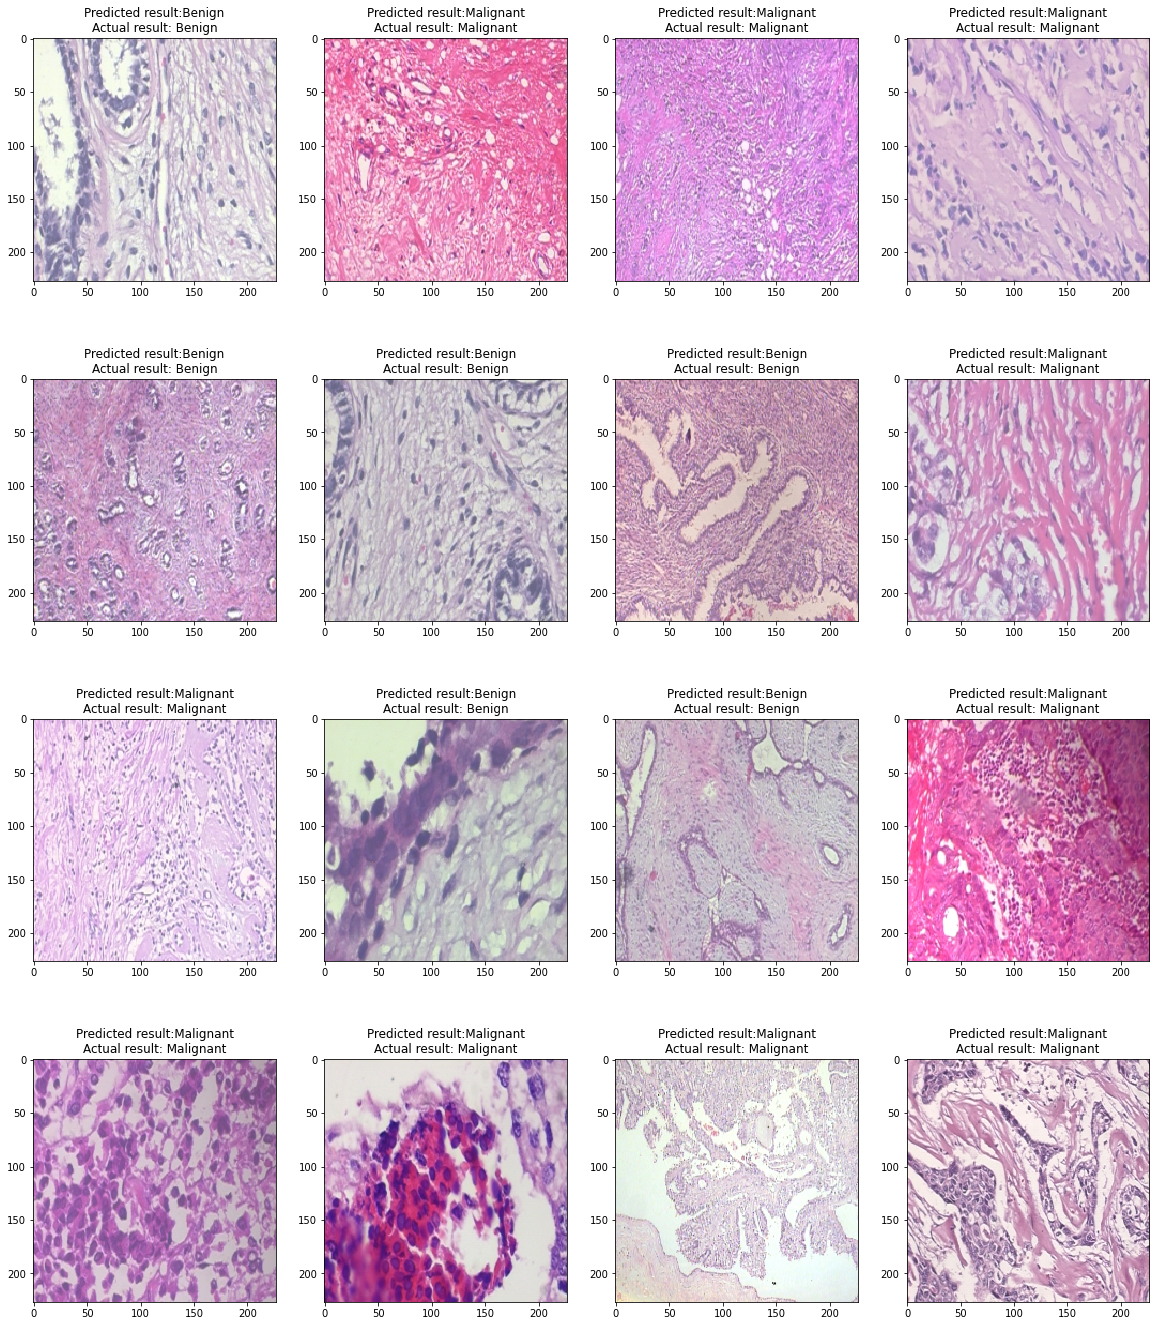

In [41]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_val)):
    if(np.argmax(y_val[i])==np.argmax(Y_val_pred[i])):
        prop_class.append(i)
    if(len(prop_class)==16):
        break

i=0
for i in range(len(y_val)):
    if(not np.argmax(y_val[i])==np.argmax(Y_val_pred[i])):
        mis_class.append(i)
    if(len(mis_class)==16):
        break

# # Display first 8 images of benign
w=40
h=40
fig=plt.figure(figsize=(20, 24))
columns = 4
rows = 4

def Transfername(namecode):
    if namecode==0:
        return "Benign"
    else:
        return "Malignant"
    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ Transfername(np.argmax(Y_val_pred[prop_class[i]]))
                       +"\n"+"Actual result: "+ Transfername(np.argmax(y_val[prop_class[i]])))
    plt.imshow(x_val[prop_class[i]], interpolation='nearest')
plt.show()